# Crossfit Open Data- Athletes

[Jean-Michel](http://jmdaignan.com/) wrote an [excellent piece](http://jmdaignan.com/2018/03/30/crossfitopen/) on the 2018 Crossfit Open. His webscrapper is available [here](https://github.com/jeanmidevacc/crossfit_webscraping).

The OG in Crossfit Open Data Analysis is of course [Sam Swift](http://swift.pw/crossfit-games-data-2012-2015/) and some of his data is [here](https://data.world/bgadoci/crossfit-data)

And thanks to this [reddit](https://www.reddit.com/r/crossfit/comments/81525y/you_can_download_crossfit_open_data_here/) I found Ray Bell's data below.

This [link](http://myopenleaderboard.com/) also seems to offer some Crossfit Open Data by affiliate.

In [1]:
import pandas as pd

### Let's import the Data
[The data files on Github](https://github.com/raybellwaves/cfanalytics/tree/master/Data) is provided by Ray Bell of Royal Caribbean. He wrote the Github project, [cfanalytics](https://github.com/raybellwaves/cfanalytics). You can [read the doc here](https://cfanalytics.readthedocs.io/en/latest/)


In [12]:
url_head = 'https://raw.githubusercontent.com/raybellwaves/cfanalytics/master/Data/'
l_url = [
    url_head + 'Women_Rx_2018.csv',
    url_head + 'Women_Rx_2017.csv'
]

In [13]:
l_data = [ pd.read_csv(iurl) for iurl in l_url]

/Users/JHO/.virtualenvs/accelerateHK3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2850: DtypeWarning: Columns (16,18,29) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):
/Users/JHO/.virtualenvs/accelerateHK3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2850: DtypeWarning: Columns (13,20) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


### Let's take a look at the data

In [14]:
l_data[0].sample(3)

,Unnamed: 0,User_id,Name,Height_(m),Weight_(kg),Age,Region_id,Region_name,Affiliate_id,Overall_rank,...,18.3_predicted_time,18.3_predicted_reps,18.4_rank,18.4_score,18.4_percentile,18.4_predicted_time,18.4_predicted_reps,18.5_rank,18.5_score,18.5_percentile
55440,55440,2080,Michelle Preggos Thorneycroft,1.69,65.0,28,21,Australasia,367,55441,...,NaN,NaN,90549,NaN,NaN,NaN,NaN,70659,3.0,9.7057
113929,113929,687092,Elizabeth Rice,1.70,66.0,29,11,North East,2783,141614,...,NaN,NaN,141023,NaN,NaN,NaN,NaN,133089,NaN,NaN
89067,89067,1231124,Jenny Fliss,NaN,NaN,31,15,South East,18528,89544,...,NaN,NaN,73619,21,24.4859,0 days 01:10:43.000000000,21.0,116186,NaN,NaN


In [16]:
l_data[0].dtypes

Unnamed: 0               int64
User_id                  int64
Name                    object
Height_(m)             float64
Weight_(kg)            float64
Age                      int64
Region_id                int64
Region_name             object
Affiliate_id             int64
Overall_rank             int64
Overall_score            int64
Overall_percentile     float64
18.1_rank                int64
18.1_score             float64
18.1_percentile        float64
18.2_rank                int64
18.2_score              object
18.2_percentile        float64
18.2_predicted_time     object
18.2_predicted_reps    float64
18.2a_rank               int64
18.2a_score            float64
18.2a_percentile       float64
18.3_rank                int64
18.3_score             float64
18.3_percentile        float64
18.3_predicted_time    float64
18.3_predicted_reps    float64
18.4_rank                int64
18.4_score              object
18.4_percentile        float64
18.4_predicted_time     object
18.4_pre

In [22]:
idf = l_data[0]
idf[ idf.Overall_score.isna() ]

,Unnamed: 0,User_id,Name,Height_(m),Weight_(kg),Age,Region_id,Region_name,Affiliate_id,Overall_rank,...,18.3_predicted_time,18.3_predicted_reps,18.4_rank,18.4_score,18.4_percentile,18.4_predicted_time,18.4_predicted_reps,18.5_rank,18.5_score,18.5_percentile


In [23]:
idf.shape

(115866, 36)

### Let's work with this!

In [19]:
fopen2018 = l_data[0].drop(columns='Unnamed: 0')
fopen2017 = l_data[1].drop(columns='Unnamed: 0')

In [67]:
fopen2018.head(3)


,User_id,Name,Height_(m),Weight_(kg),Age,Region_id,Region_name,Affiliate_id,Overall_rank,Overall_score,...,18.3_predicted_time,18.3_predicted_reps,18.4_rank,18.4_score,18.4_percentile,18.4_predicted_time,18.4_predicted_reps,18.5_rank,18.5_score,18.5_percentile
0,123582,Cassidy Lance-Mcwherter,1.60,64.0,30,15,South East,16524,1,189,...,NaN,NaN,8,0 days 00:06:30,99.9911,0 days 00:06:30.000000000,228.0,10,186.0,99.9885
1,2942,Kara Saunders,1.62,73.0,28,21,Australasia,19961,2,193,...,NaN,NaN,23,0 days 00:06:51,99.9720,0 days 00:06:51.000000000,217.0,1,201.0,100.0000
2,239148,Carolyne Prevost,1.60,66.0,28,18,Canada East,718,3,260,...,NaN,NaN,20,0 days 00:06:49,99.9758,0 days 00:06:49.000000000,218.0,19,183.0,99.9770


## Who are the ladies of Crossfit?
* How many ladies competed by region?
* How old are they? distributed by region
* Weight and Height of all Athletes vs the top 1% of ladies


First thing first, we need something to plot with in python. I like Seaborn.

In [50]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np

sns.set(color_codes=True) #overide maplot libs ugly colours.
mpl.rcParams['figure.figsize'] = [13, 8] #default figure size

/Users/JHO/.virtualenvs/accelerateHK3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


[Text(0,0,'Africa Middle East'),
 Text(0,0,'Asia'),
 Text(0,0,'Australasia'),
 Text(0,0,'Canada East'),
 Text(0,0,'Canada West'),
 Text(0,0,'Central America'),
 Text(0,0,'Central East'),
 Text(0,0,'Europe Central'),
 Text(0,0,'Europe North'),
 Text(0,0,'Europe South'),
 Text(0,0,'Mid Atlantic'),
 Text(0,0,'North Central'),
 Text(0,0,'North East'),
 Text(0,0,'South America'),
 Text(0,0,'South Central'),
 Text(0,0,'South East'),
 Text(0,0,'South West'),
 Text(0,0,'West Coast')]

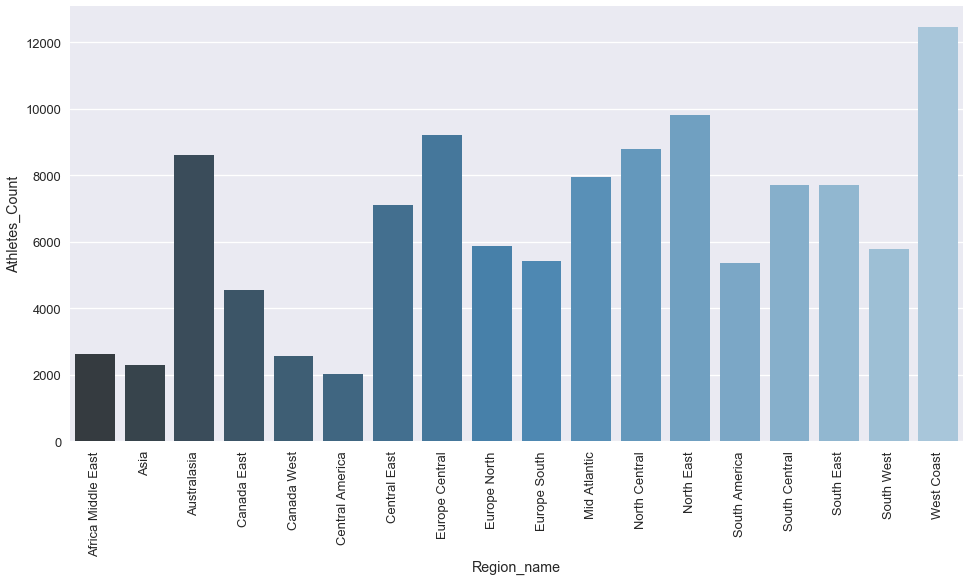

In [48]:
g_df = fopen2018.groupby('Region_name')['Name'].agg({'Athletes_Count': 'count'})

plt.figure( figsize = (16,8))
sns.set(style = 'darkgrid', context = 'talk')
bplot = sns.barplot(
                #data = g_df,
                x = g_df.index ,
                y = g_df.Athletes_Count,
                palette = 'Blues_d'
        )
bplot.set_xticklabels(g_df.index, rotation = 90)

### Age Distribution by Region
Following the example [here](https://python-graph-gallery.com/25-histogram-with-several-variables-seaborn/) and [here](https://stackoverflow.com/questions/46045750/python-distplot-with-multiple-distributions); would be awesome if `sns.distplot()` allows the `hue` kwarg.

In [68]:
# let's add an American column
l_us_reg = ['South East', 'South West', 
            'North Central', 'South Central', 
            'North East', 'Mid Atlantic', 
            'Central East', 'West Coast'
           ]
fopen2018['is_US'] = fopen2018.Region_name.apply( lambda x: True if x in l_us_reg else False )
fopen2018.sample(10)

,User_id,Name,Height_(m),Weight_(kg),Age,Region_id,Region_name,Affiliate_id,Overall_rank,Overall_score,...,18.3_predicted_reps,18.4_rank,18.4_score,18.4_percentile,18.4_predicted_time,18.4_predicted_reps,18.5_rank,18.5_score,18.5_percentile,is_US
20111,1215403,Megan McManus,1.55,52.0,18,14,South Central,18504,20112,152620,...,NaN,16390,90,79.5656,0 days 00:16:30.000000000,90.0,14796,94.0,81.0934,True
52709,1084408,Danyelle Wilde,1.65,70.0,30,6,Central East,9739,52710,349218,...,NaN,54190,25,31.1625,0 days 00:59:24.000000000,25.0,55940,51.0,28.5152,True
53769,143931,Courtney Osborne,1.75,64.0,40,19,West Coast,18423,53770,355082,...,NaN,45750,34,42.7813,0 days 00:43:41.000000000,34.0,70659,3.0,9.7057,True
65738,1260072,Rachel Cechovic,1.55,52.0,28,6,Central East,0,65739,420661,...,NaN,97481,NaN,NaN,NaN,NaN,84151,NaN,NaN,True
101682,1303169,Alison Yong,1.75,70.0,47,20,Asia,15581,107008,629932,...,NaN,64476,21,24.4859,0 days 01:10:43.000000000,21.0,107967,NaN,NaN,False
4378,1076868,Gabriela Balazova,1.61,62.0,33,23,Europe Central,232,4379,39233,...,NaN,4009,116,95.2016,0 days 00:12:48.000000000,116.0,6322,111.0,91.9224,False
12146,416640,Tamosin Chapman,1.60,58.0,27,21,Australasia,5107,12147,97891,...,NaN,11585,99,85.3464,0 days 00:15:00.000000000,99.0,21616,85.0,72.3781,False
26233,62748,Angela Perez-Castle,1.57,57.0,43,14,South Central,770,26233,192429,...,NaN,28660,65,63.6751,0 days 00:22:51.000000000,65.0,25195,82.0,67.8044,True
16296,243924,Cassie Schlarb,1.60,57.0,30,17,South West,1899,16297,126558,...,NaN,12265,98,84.7916,0 days 00:15:09.000000000,98.0,11584,100.0,85.1980,True
23698,774513,Cainara Draeger,NaN,NaN,29,27,South America,14384,23699,175868,...,NaN,37034,53,52.8847,0 days 00:28:01.000000000,53.0,38799,71.0,50.4198,False


/Users/JHO/.virtualenvs/accelerateHK3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 1152x576 with 0 Axes>

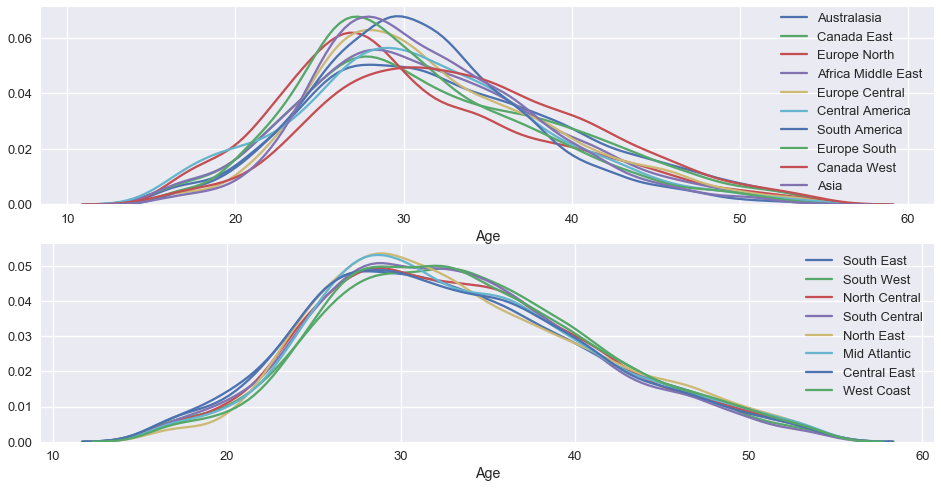

In [74]:
plt.figure( figsize = (16,8))
sns.set(style = 'darkgrid', context = 'talk')

# let's plot them side by side, US vs World
g, axes = plt.subplots(2,1, figsize=(16,8), sharex = False)

for region in fopen2018[ fopen2018.is_US == False ].Region_name.unique():
    sns.distplot(
                fopen2018[fopen2018.Region_name == region]['Age'],
                label = region,
                hist = False,
                ax = axes[0]
        )

for region in fopen2018[ fopen2018.is_US == True ].Region_name.unique():
    sns.distplot(
                fopen2018[fopen2018.Region_name == region]['Age'],
                label = region,
                hist = False,
                ax = axes[1]
        )

Perhaps a boxplot would be better

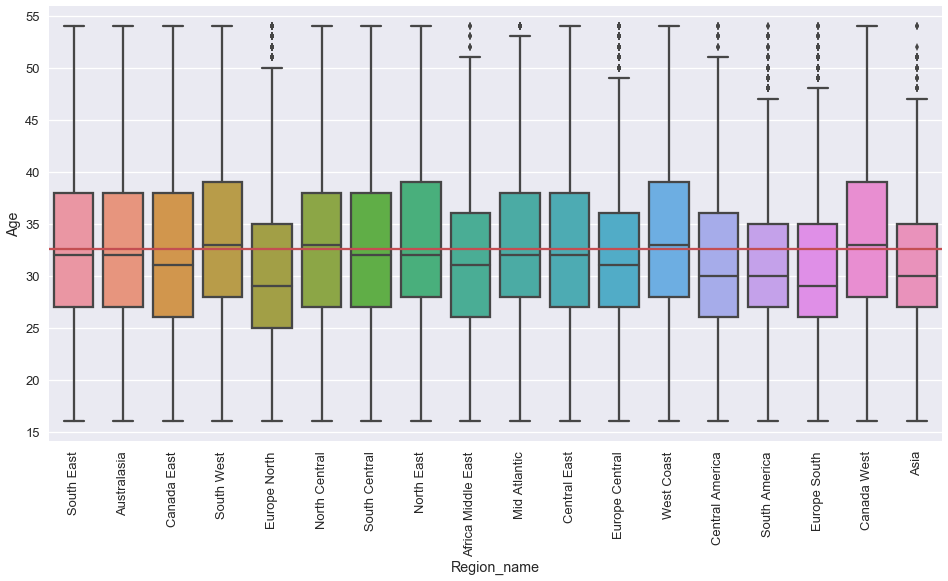

In [89]:
plt.figure( figsize = (16,8))
sns.set(style = 'darkgrid', context = 'talk')
g = sns.boxplot( data = fopen2018, x='Region_name', y='Age')
g.set_xticklabels(g.get_xticklabels(), rotation = 90)
mean_age = fopen2018.Age.mean()
g.hlines( mean_age, g.get_xlim()[0], g.get_xlim()[1] , color = 'r')

### let's look at the Ladies' Weight & Height

We need to clean some data first
* rename the height and weight columns
* remove na height and weight
* Remove height< 1 and height> 2
* Remove weight<30 and weight> 150

In [133]:
# rename the columns better
col_name_dict = {
    'Height_(m)': 'height_meters',
    'Weight_(kg)': 'weight_kg'
}
clean_f2018_df = fopen2018.rename(columns = col_name_dict)
clean_f2018_df = fopen2018.dropna(subset=['height_meters', 'weight_kg'])

# add a new col for top 1 percent
top1pct= len(clean_f2018_df) * 0.01
clean_f2018_df['top1'] = clean_f2018_df.Overall_rank.apply( lambda x: True if x <= top1pct else False)

#l_dfilter = (clean_f2018_df.height_meters < 1) & (clean_f2018_df.height_meters > 2) & (clean_f2018_df.weight_kg < 30) & (clean_f2018_df.weight_kg > 150)
l_dfilter = [
    clean_f2018_df.height_meters > 1,
    clean_f2018_df.height_meters < 2,
    clean_f2018_df.weight_kg > 30, 
    clean_f2018_df.weight_kg < 150
]
from functools import reduce
dfilter = reduce( lambda x, y: x & y, l_dfilter)
#dfilter.mean() # this should not be 1


clean_f2018_df = clean_f2018_df[ dfilter ]


/Users/JHO/.virtualenvs/accelerateHK3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


/Users/JHO/.virtualenvs/accelerateHK3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/JHO/.virtualenvs/accelerateHK3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


<Figure size 576x1152 with 0 Axes>

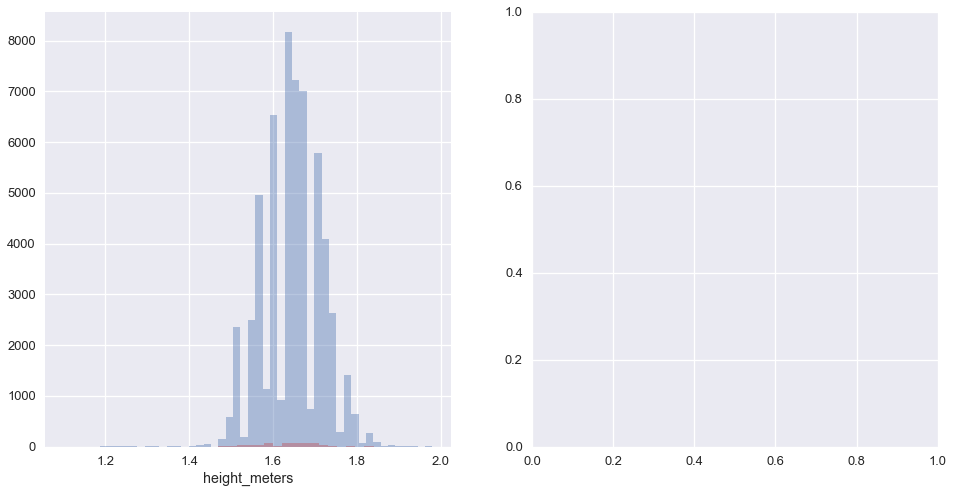

In [132]:
plt.figure( figsize = (8,16))
sns.set(style = 'darkgrid', context = 'talk')

top1pct= len(clean_f2018_df) * 0.01


# let's plot Weight & Height side by side
g, axes = plt.subplots(1,2, figsize=(16,8), sharex = False)

sns.distplot(
            clean_f2018_df[ clean_f2018_df.Overall_rank > top1pct]['height_meters'],
            label = 'height_dist',
            hist = True,
            kde = False,
            ax = axes[0]
    )

sns.distplot(
            clean_f2018_df[ clean_f2018_df.Overall_rank <= top1pct]['height_meters'],
            label = 'height_dist',
            hist = True,
            kde = False,
            ax = axes[0],
            color = 'r'
    )

<Figure size 576x576 with 0 Axes>

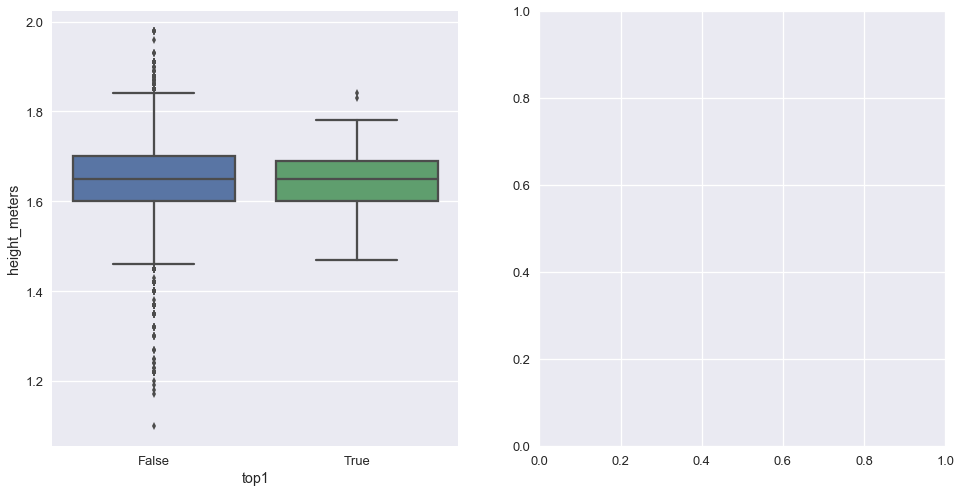

In [137]:
plt.figure( figsize = (8,8))
sns.set(style = 'darkgrid', context = 'talk')

# let's plot Weight & Height side by side
g, axes = plt.subplots(1,2, figsize=(16,8), sharex = False)

g = sns.boxplot( data = clean_f2018_df, x='top1', y='height_meters', ax= axes[0])
#g.set_xticklabels(g.get_xticklabels(), rotation = 90)

mean_age = fopen2018.Age.mean()
#g.hlines( mean_age, g.get_xlim()[0], g.get_xlim()[1] , color = 'r')